In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

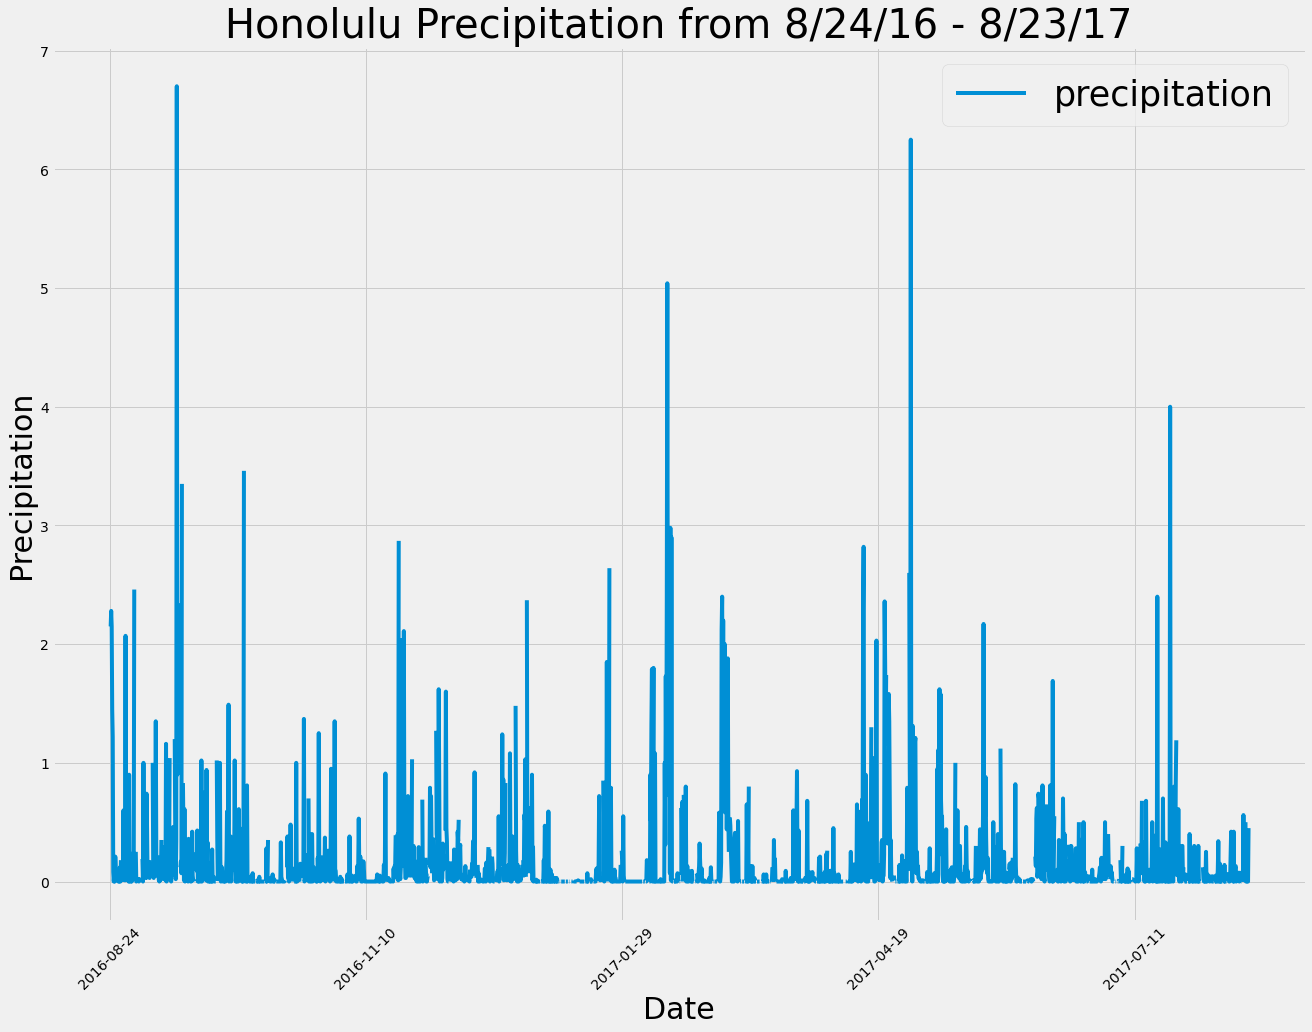

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year_ago = (dt.datetime.strptime(most_recent_date[0],'%Y-%m-%d') - \
                dt.timedelta(weeks=52)).strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= \
                one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip, columns = ["date", "prcp"])
precip_df.set_index("date", inplace=True)

# Sort the dataframe by date
precip_df = precip_df.sort_values(["date"])

# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(figsize=(20,15),rot=45)
ax.set_title("Honolulu Precipitation from 8/24/16 - 8/23/17", fontsize=40)
ax.set_xlabel("Date", fontsize=30)
ax.set_ylabel("Precipitation", fontsize=30)
ax.legend(['precipitation'], fontsize=35)

# save figure as a .png file
plt.savefig("Images/precipitation.png")

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
### How would I add the station names - from the Station Data???
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

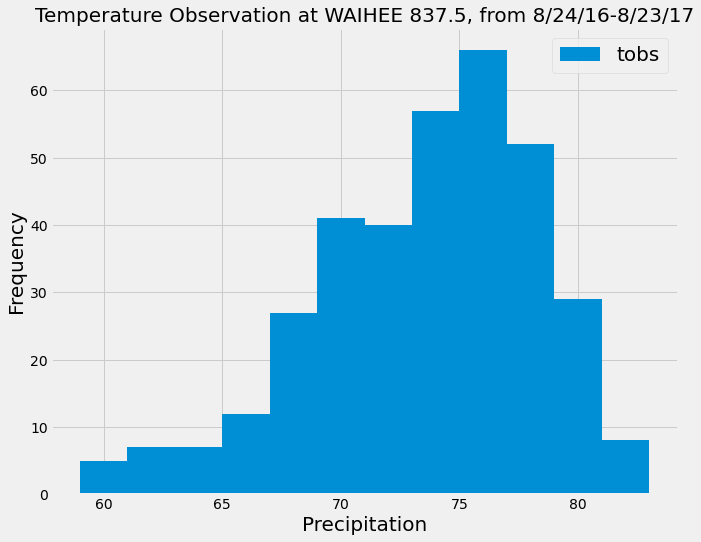

In [15]:
# Using the most active station id
# Query the last year of temperature observation data and plot the results as a histogram
most_active_station = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station \
        == 'USC00519281').filter(Measurement.date >= one_year_ago).all()

most_active_station_df = pd.DataFrame(most_active_station)
most_active_station_df.plot(kind="hist", bins=12, figsize=(10,8))
plt.xlabel("Precipitation", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.title("Temperature Observation at WAIHEE 837.5, from 8/24/16-8/23/17", fontsize=20)
plt.legend(fontsize = 20)

# save figure as a .png file
plt.savefig("Images/station-histogram.png")

# Close session

In [16]:
# Close Session
session.close()